Loading in Pupil Data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
#below imports a way to time how long the script takes
import time
import random

In [2]:
then = time.time()

#data_folder = '../po_fordc/'
data_folder = '../data/dc_new_pocsvs/'
data_list=os.listdir(data_folder)
#data_folder = '../data/'
os.listdir(data_folder)
pup_files = sorted([f for f in os.listdir(data_folder) if ('PO' in f) and ('.csv' in f)])

f={}#for dictionary
colnames =["subject","unknown", "nums", "xcoor", "ycoor", "pupsize", "timing", "trial","experiment", "tone1", "tone2", "condition", "image", "one", "dot1", "dot2", "dot3", "trialfalse", "NOCLICK", "noclick"]
for a in range(len(pup_files)):
    participant= data_folder+pup_files[a]
    df_podcdat = pd.read_csv(participant, names=colnames)
    #put timing column into list to make easier to work with pandas
    timing = df_podcdat.timing.tolist()
    pupsize = df_podcdat.pupsize.tolist()
    new_timing=[]
    for b in range(len(timing)):#Start from begining to end of timing list
        num = timing[b]#set num = to timing at specific location in list
        if num%2 !=0:# if number divided by 2 has a remainder that is not 0
            num = num + 1 # take that number with the nonzero remainder and add one to it
            new_timing.append(num)# take the new number and append it to the new_timing list
        else:# if the number is even
            new_timing.append(num)# take the even number and append it to the new_timing list
    new_timing = pd.DataFrame(new_timing)
    result = pd.concat([df_podcdat, new_timing], axis=1)
    result = result.rename(columns = {0:'newtiming'})
    pup_zeros=[]
    for c in range(len(pupsize)):#Start from begining to end of pupsize list
        num = pupsize[c]#set num = to pupsize at specific location in list, index?
        if num == 0:# if number is 0
            pup_zeros.append(c)# take the index location and append it to the pup_zeros list
    pup_array=np.asarray(pupsize)
    pz = pd.DataFrame(pup_zeros)
    pup_all = pd.DataFrame().reindex_like(pz)
    before = pd.DataFrame().reindex_like(pz)
    after = pd.DataFrame().reindex_like(pz)


    pup_all = pup_all.rename(columns = {0:'original'})
    before = before.rename(columns = {0:'before'})
    after = after.rename(columns = {0:'after'})
    pup_all = pd.concat([pup_all, before, after],axis=1)

    for d in range(len(pup_zeros)):
        pup_all.original[d] = pup_zeros[d]
        pup_all.before[d] = pup_zeros[d] - 75
        pup_all.after[d] = pup_zeros[d] + 75


    #group by sequence
    #take list value by value find one not a number in sequence pull and store index of 150 samples before vlaue 
    #then if next not is only one greater then last one if it is greater make that a new one 

    #interp 1.2 - RM suggestion convert this into using df.apply()
    #works!!!! but now lets see if it is actually doing what i think it is doing 
    for e in range(len(result)):
        if result.pupsize[e]==0:
            before=e-75
            after=e+75
            result.pupsize.ix[before:after] = np.nan

    print("done")

    result['interp_pupsize'] = result.pupsize.interpolate()#(method='spline', order=2) #figuring out how we want to interp

    subsetres = result.loc[(result["newtiming"]==4500),:]
    forbaseline = subsetres[['interp_pupsize','trial']]
    forbaseline = forbaseline.reset_index()
    forbaseline = forbaseline.rename(index=str, columns={"interp_pupsize": "baseval"})
    result = forbaseline.merge(result, on = 'trial', how = 'right')

    result['bvaled'] = 0
    result['bvaled'] = (result.interp_pupsize - result.baseval)
    #Writing to csv method (uncomment to change method)
#     new='new.csv'
#     result.to_csv(pup_files[a]+new)
    f[pup_files[a]]=pd.DataFrame(result)
    #f[pup_files[a]]=result
#     good#Writing to Pandas DF method (uncomment to change method)
#     result=pd.DataFrame(result)
#     f[pup_files[a]]=result

/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [3]:
#run this right after you run the above for accurate timing
now = time.time()

#writing to pandas DF
print("It took: ", now-then, " seconds")

It took:  104.38951277732849  seconds


In [4]:
goods=os.listdir(data_folder)
#goods.drop['.DS_Store'] Only need with some folders


if '.DS_Store' in goods :
         goods.remove('.DS_Store')
for j in range(len(f)):
    goods[j] =pd.DataFrame.from_dict(f[os.listdir(data_folder)[j]])

pdofpds = pd.concat(goods)

In [5]:
by_row_index = pdofpds.groupby(['condition','newtiming'])
df_means = by_row_index.mean()
df_means

index     baseval      trial          nums  \
condition newtiming                                                      
dv.wav    0          64583.722222  590.303789  15.972222  3.747387e+07   
          2          63965.383333  585.830921  15.825000  3.624247e+07   
          4          63965.383333  585.830921  15.825000  3.624248e+07   
          6          63965.383333  585.830921  15.825000  3.624248e+07   
          8          63965.383333  585.830921  15.825000  3.624248e+07   
          10         63965.383333  585.830921  15.825000  3.624248e+07   
          12         63965.383333  585.830921  15.825000  3.624248e+07   
          14         63965.383333  585.830921  15.825000  3.624249e+07   
          16         63965.383333  585.830921  15.825000  3.624249e+07   
          18         63965.383333  585.830921  15.825000  3.624249e+07   
          20         63965.383333  585.830921  15.825000  3.624249e+07   
          22         63965.383333  585.830921  15.825000  3.624249e+07   
          24         63965.383333  585.830921  15.825000  3.624250e+07   
          26         63965.383333  585.830921  15.825000  3.624250e+07   
          28         63965.383333  585.830921  15.825000  3.624250e+07   
          30         63965.383333  585.830921  15.825000  3.624250e+07   
          32         63965.383333  585.830921  15.825000  3.624250e+07   
          34         63965.383333  585.830921  15.825000  3.624251e+07   
          36         63965.383333  585.830921  15.825000  3.624251e+07   
          38         63965.383333  585.830921  15.825000  3.624251e+07   
          40         63965.383333  585.830921  15.825000  3.624251e+07   
          42         63965.383333  585.830921  15.825000  3.624251e+07   
          44         63965.383333  585.830921  15.825000  3.624252e+07   
          46         63965.383333  585.830921  15.825000  3.624252e+07   
          48         63965.383333  585.830921  15.825000  3.624252e+07   
          50         63965.383333  585.830921  15.825000  3.624252e+07   
          52         63965.383333  585.830921  15.825000  3.624252e+07   
          54         63965.383333  585.830921  15.825000  3.624253e+07   
          56         63965.383333  585.830921  15.825000  3.624253e+07   
          58         63965.383333  585.830921  15.825000  3.624253e+07   
...                           ...         ...        ...           ...   
st.wav    8274       67641.232143  589.637215  16.706633  3.577896e+07   
          8276       67641.232143  589.637215  16.706633  3.577896e+07   
          8278       67641.232143  589.637215  16.706633  3.577896e+07   
          8280       67641.232143  589.637215  16.706633  3.577896e+07   
          8282       67641.232143  589.637215  16.706633  3.577896e+07   
          8284       67641.232143  589.637215  16.706633  3.577897e+07   
          8286       67641.232143  589.637215  16.706633  3.577897e+07   
          8288       67641.232143  589.637215  16.706633  3.577897e+07   
          8290       67641.232143  589.637215  16.706633  3.577897e+07   
          8292       67641.232143  589.637215  16.706633  3.577897e+07   
          8294       67641.232143  589.637215  16.706633  3.577898e+07   
          8296       67641.232143  589.637215  16.706633  3.577898e+07   
          8298       67641.232143  589.637215  16.706633  3.577898e+07   
          8300       67641.232143  589.637215  16.706633  3.577898e+07   
          8302       67641.232143  589.637215  16.706633  3.577898e+07   
          8304       67641.232143  589.637215  16.706633  3.577899e+07   
          8306       67641.232143  589.637215  16.706633  3.577899e+07   
          8308       67641.232143  589.637215  16.706633  3.577899e+07   
          8310       67641.232143  589.637215  16.706633  3.577899e+07   
          8312       67641.232143  589.637215  16.706633  3.577899e+07   
          8314       67641.232143  589.637215  16.706633  3.577900e+07   
          8316       67641.23214

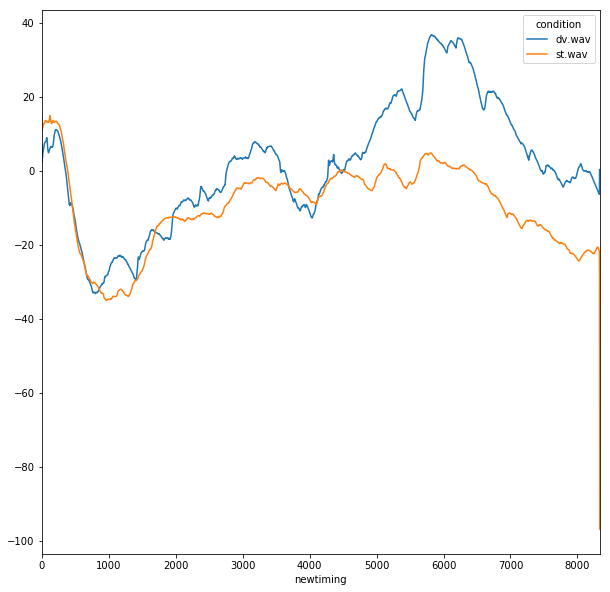

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
pdofpds.groupby(['newtiming', 'condition']).mean()['bvaled'].unstack().plot(ax = ax)

In [7]:
fig.savefig('../misc/DV_vs_ST_graph.png')

different ways to look at a specific files


In [8]:
pdofpds[f['']['condition']=='st.wav'].plot(x='newtiming', y='bvaled', label='trial')

KeyError: ''

In [ ]:
#use this to check stuff out!
f['POJIL1.csv'][f['POJIL1.csv']['trial']==7]

#use this to graph some things and whatnot 
#f['POJQL3.csv'][f['POJQL3.csv']].plot(x='newtiming', y='bvaled', label='trial')
f['POJQL3.csv'][f['POJQL3.csv']['condition']=='st.wav'].plot(x='newtiming', y='bvaled', label='trial')